已連線至 base (Python 3.11.5)

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer    
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('Data.csv')

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer    
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [3]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [4]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer    
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('Data.csv')
df.isna().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer    
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('Data.csv')
df.isna().sum()
df = df.fillna(df.mean())

TypeError: Could not convert ['FranceSpainGermanySpainGermanyFranceSpainFranceGermanyFrance'
 'NoYesNoNoYesYesNoYesNoYes'] to numeric

In [6]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [7]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer    
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('Data.csv')
df.isna().sum()

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values   

# 缺值用 平均數田
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3]) # 缺少的用mean 填寫 實體化
X[:,1:3] = imputer.transform(X[:, 1:3]) # 塞回去原本的缺少

# onehot encoding
#col方入要改的label
ct=ColumnTransformer(transformers=
						[('encoder', OneHotEncoder(), [0])], 
						remainder='passthrough')

X= np.array(ct.fit_transform(X))

In [8]:
X


array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [9]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [10]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer    
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('Data.csv')
df.isna().sum()

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values   

# 缺值用 平均數田
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3]) # 缺少的用mean 填寫 實體化
X[:,1:3] = imputer.transform(X[:, 1:3]) # 塞回去原本的缺少

# onehot encoding
#col方入要改的label
ct=ColumnTransformer(transformers=
						[('encoder', OneHotEncoder(), [0])], 
						remainder='passthrough')

X= np.array(ct.fit_transform(X))

# label encoding
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [12]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer    
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
df = pd.read_csv('Data.csv')
df.isna().sum()

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values   

# 缺值用 平均數田
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3]) # 缺少的用mean 填寫 實體化
X[:,1:3] = imputer.transform(X[:, 1:3]) # 塞回去原本的缺少

# onehot encoding
#col方入要改的label
ct=ColumnTransformer(transformers=
						[('encoder', OneHotEncoder(), [0])], 
						remainder='passthrough')

X= np.array(ct.fit_transform(X))

# label encoding
le = LabelEncoder()
y = le.fit_transform(y)


# split data    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# feature scaling
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

# polynomial regression

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)

# model instance
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
poly_reg.fit(X_poly, y_train)
svm_reg = SVR(kernel = 'rbf')
svm_reg.fit(X_train, y_train)
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

# predict
y_pred_lin = lin_reg.predict(X_test)
y_pred_svm = svm_reg.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# accuracy
print(accuracy_score(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_lin))
print(accuracy_score(y_test, y_pred_svm))

0.5
0.0


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [13]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer    
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

from sklearn.metrics import r2_score
df = pd.read_csv('Data.csv')
df.isna().sum()

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values   

# 缺值用 平均數田
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3]) # 缺少的用mean 填寫 實體化
X[:,1:3] = imputer.transform(X[:, 1:3]) # 塞回去原本的缺少

# onehot encoding
#col方入要改的label
ct=ColumnTransformer(transformers=
						[('encoder', OneHotEncoder(), [0])], 
						remainder='passthrough')

X= np.array(ct.fit_transform(X))

# label encoding
le = LabelEncoder()
y = le.fit_transform(y)


# split data    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# feature scaling
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

# polynomial regression

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)

# model instance
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
poly_reg.fit(X_poly, y_train)
svm_reg = SVR(kernel = 'rbf')
svm_reg.fit(X_train, y_train)
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

# predict
y_pred_lin = lin_reg.predict(X_test)
y_pred_ploy=poly_reg.predict(poly_reg.fit_transform(X_test))    
y_pred_svm = svm_reg.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

df_predictions = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lin,
    'Polynomial Regression': y_pred_ploy,
    'SVM': y_pred_svm,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
})

AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

In [14]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 創建一個多項式特徵轉換器
poly_reg = PolynomialFeatures(degree = 4)

# 使用轉換器來轉換訓練數據
X_poly = poly_reg.fit_transform(X_train)

# 創建一個線性迴歸模型
lin_reg_poly = LinearRegression()

# 使用線性迴歸模型來擬合轉換後的數據
lin_reg_poly.fit(X_poly, y_train)

# 使用線性迴歸模型來預測測試數據
y_pred_poly = lin_reg_poly.predict(poly_reg.transform(X_test))

In [16]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer    
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

from sklearn.metrics import r2_score
df = pd.read_csv('Data.csv')
df.isna().sum()

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values   

# 缺值用 平均數田
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3]) # 缺少的用mean 填寫 實體化
X[:,1:3] = imputer.transform(X[:, 1:3]) # 塞回去原本的缺少

# onehot encoding
#col方入要改的label
ct=ColumnTransformer(transformers=
						[('encoder', OneHotEncoder(), [0])], 
						remainder='passthrough')

X= np.array(ct.fit_transform(X))

# label encoding
le = LabelEncoder()
y = le.fit_transform(y)


# split data    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# feature scaling
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

# polynomial regression

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)

# model instance
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
svm_reg = SVR(kernel = 'rbf')
svm_reg.fit(X_train, y_train)
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

lin_reg_poly = LinearRegression()

# 使用線性迴歸模型來擬合轉換後的數據
lin_reg_poly.fit(X_poly, y_train)

# 使用線性迴歸模型來預測測試數據

# predict
y_pred_lin = lin_reg.predict(X_test)
y_pred_poly = lin_reg_poly.predict(poly_reg.transform(X_test))   
y_pred_svm = svm_reg.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

df_predictions = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lin,
    'Polynomial Regression': y_pred_poly,
    'SVM': y_pred_svm,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
})

In [17]:
df_predictions

,Actual,Linear Regression,Polynomial Regression,SVM,Decision Tree,Random Forest
0,0,1.455626,5.723103,0.981941,1,1
1,1,1.060432,0.162244,0.661339,1,0


ValueError: x and y must be the same size

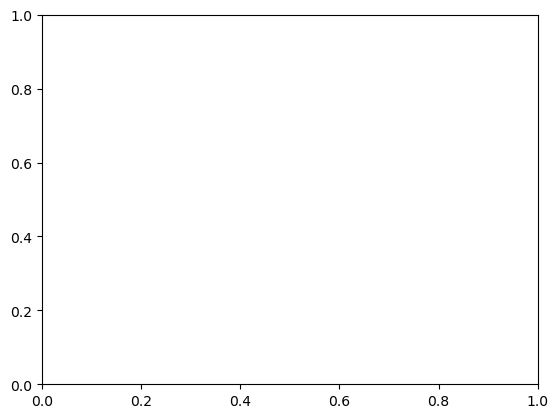

In [18]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer    
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

from sklearn.metrics import r2_score
df = pd.read_csv('Data.csv')
df.isna().sum()

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values   

# 缺值用 平均數田
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3]) # 缺少的用mean 填寫 實體化
X[:,1:3] = imputer.transform(X[:, 1:3]) # 塞回去原本的缺少

# onehot encoding
#col方入要改的label
ct=ColumnTransformer(transformers=
						[('encoder', OneHotEncoder(), [0])], 
						remainder='passthrough')

X= np.array(ct.fit_transform(X))

# label encoding
le = LabelEncoder()
y = le.fit_transform(y)


# split data    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# feature scaling
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

# polynomial regression

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)

# model instance
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
svm_reg = SVR(kernel = 'rbf')
svm_reg.fit(X_train, y_train)
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

lin_reg_poly = LinearRegression()

# 使用線性迴歸模型來擬合轉換後的數據
lin_reg_poly.fit(X_poly, y_train)

# 使用線性迴歸模型來預測測試數據

# predict
np.set_printoptions(precision=2)
y_pred_lin = lin_reg.predict(X_test)
y_pred_poly = lin_reg_poly.predict(poly_reg.transform(X_test))   
y_pred_svm = svm_reg.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

df_predictions = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lin,
    'Polynomial Regression': y_pred_poly,
    'SVM': y_pred_svm,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
})

# y_pred = regressor.predict(X_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


# accuracy
lin_r2=r2_score(y_test, y_pred_lin)
ploy_r2=r2_score(y_test, y_pred_poly)
svm_r2=r2_score(y_test, y_pred_svm)
# not use accuracy_score 比較不好
dt_r2=r2_score(y_test, y_pred_dt)
rf_r2=r2_score(y_test, y_pred_rf)

# plot

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg_poly.predict(poly_reg.transform(X_train)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, svm_reg.predict(X_train), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, dt.predict(X_train), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, rf.predict(X_train), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

for i in range(0, len(df_predictions.columns)):
    print(df_predictions.columns[i], r2_score(y_test, df_predictions.iloc[:, i]))





# Path: Ml.py

In [19]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer    
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

from sklearn.metrics import r2_score
df = pd.read_csv('Data.csv')
df.isna().sum()

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values   

# 缺值用 平均數田
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3]) # 缺少的用mean 填寫 實體化
X[:,1:3] = imputer.transform(X[:, 1:3]) # 塞回去原本的缺少

# onehot encoding
#col方入要改的label
ct=ColumnTransformer(transformers=
						[('encoder', OneHotEncoder(), [0])], 
						remainder='passthrough')

X= np.array(ct.fit_transform(X))

# label encoding
le = LabelEncoder()
y = le.fit_transform(y)


# split data    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# feature scaling
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

# polynomial regression

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)

# model instance
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
svm_reg = SVR(kernel = 'rbf')
svm_reg.fit(X_train, y_train)
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

lin_reg_poly = LinearRegression()

# 使用線性迴歸模型來擬合轉換後的數據
lin_reg_poly.fit(X_poly, y_train)

# 使用線性迴歸模型來預測測試數據

# predict
np.set_printoptions(precision=2)
y_pred_lin = lin_reg.predict(X_test)
y_pred_poly = lin_reg_poly.predict(poly_reg.transform(X_test))   
y_pred_svm = svm_reg.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

df_predictions = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lin,
    'Polynomial Regression': y_pred_poly,
    'SVM': y_pred_svm,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
})

# y_pred = regressor.predict(X_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


# accuracy
lin_r2=r2_score(y_test, y_pred_lin)
ploy_r2=r2_score(y_test, y_pred_poly)
svm_r2=r2_score(y_test, y_pred_svm)
# not use accuracy_score 比較不好
dt_r2=r2_score(y_test, y_pred_dt)
rf_r2=r2_score(y_test, y_pred_rf)
df_predictions['r2'] = [lin_r2, ploy_r2, svm_r2, dt_r2, rf_r2]

ValueError: Length of values (5) does not match length of index (2)

In [20]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer    
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

from sklearn.metrics import r2_score
df = pd.read_csv('Data.csv')
df.isna().sum()

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values   

# 缺值用 平均數田
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3]) # 缺少的用mean 填寫 實體化
X[:,1:3] = imputer.transform(X[:, 1:3]) # 塞回去原本的缺少

# onehot encoding
#col方入要改的label
ct=ColumnTransformer(transformers=
						[('encoder', OneHotEncoder(), [0])], 
						remainder='passthrough')

X= np.array(ct.fit_transform(X))

# label encoding
le = LabelEncoder()
y = le.fit_transform(y)


# split data    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# feature scaling
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

# polynomial regression

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)

# model instance
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
svm_reg = SVR(kernel = 'rbf')
svm_reg.fit(X_train, y_train)
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

lin_reg_poly = LinearRegression()

# 使用線性迴歸模型來擬合轉換後的數據
lin_reg_poly.fit(X_poly, y_train)

# 使用線性迴歸模型來預測測試數據

# predict
np.set_printoptions(precision=2)
y_pred_lin = lin_reg.predict(X_test)
y_pred_poly = lin_reg_poly.predict(poly_reg.transform(X_test))   
y_pred_svm = svm_reg.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

df_predictions = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lin,
    'Polynomial Regression': y_pred_poly,
    'SVM': y_pred_svm,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
})

# y_pred = regressor.predict(X_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


# accuracy
lin_r2=r2_score(y_test, y_pred_lin)
ploy_r2=r2_score(y_test, y_pred_poly)
svm_r2=r2_score(y_test, y_pred_svm)
# not use accuracy_score 比較不好
dt_r2=r2_score(y_test, y_pred_dt)
rf_r2=r2_score(y_test, y_pred_rf)
df_r2 = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'SVM', 'Decision Tree', 'Random Forest'],
    'r2': [lin_r2, ploy_r2, svm_r2, dt_r2, rf_r2]
})
model_info=pd.concat([df_predictions, df_r2], axis=1)

In [21]:
model_info

,Actual,Linear Regression,Polynomial Regression,SVM,Decision Tree,Random Forest,Model,r2
0,0.0,1.455626,5.723103,0.981941,1.0,1.0,Linear Regression,-3.244997
1,1.0,1.060432,0.162244,0.661339,1.0,0.0,Polynomial Regression,-65.911477
2,NaN,NaN,NaN,NaN,NaN,NaN,SVM,-1.157801
3,NaN,NaN,NaN,NaN,NaN,NaN,Decision Tree,-1.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,Random Forest,-3.000000


In [22]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer    
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

from sklearn.metrics import r2_score
df = pd.read_csv('Data.csv')
df.isna().sum()

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values   

# 缺值用 平均數田
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3]) # 缺少的用mean 填寫 實體化
X[:,1:3] = imputer.transform(X[:, 1:3]) # 塞回去原本的缺少

# onehot encoding
#col方入要改的label
ct=ColumnTransformer(transformers=
						[('encoder', OneHotEncoder(), [0])], 
						remainder='passthrough')

X= np.array(ct.fit_transform(X))

# label encoding
le = LabelEncoder()
y = le.fit_transform(y)


# split data    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# feature scaling
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

# polynomial regression

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)

# model instance
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
svm_reg = SVR(kernel = 'rbf')
svm_reg.fit(X_train, y_train)
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

lin_reg_poly = LinearRegression()

# 使用線性迴歸模型來擬合轉換後的數據
lin_reg_poly.fit(X_poly, y_train)

# 使用線性迴歸模型來預測測試數據

# predict
np.set_printoptions(precision=2)
y_pred_lin = lin_reg.predict(X_test)
y_pred_poly = lin_reg_poly.predict(poly_reg.transform(X_test))   
y_pred_svm = svm_reg.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

df_predictions = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lin,
    'Polynomial Regression': y_pred_poly,
    'SVM': y_pred_svm,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
})

# y_pred = regressor.predict(X_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


# accuracy
lin_r2=r2_score(y_test, y_pred_lin)
ploy_r2=r2_score(y_test, y_pred_poly)
svm_r2=r2_score(y_test, y_pred_svm)
# not use accuracy_score 比較不好
dt_r2=r2_score(y_test, y_pred_dt)
rf_r2=r2_score(y_test, y_pred_rf)
df_r2 = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'SVM', 'Decision Tree', 'Random Forest'],
    'r2': [lin_r2, ploy_r2, svm_r2, dt_r2, rf_r2]
})
model_info=pd.concat([df_predictions, df_r2], axis=0)

In [23]:
model_info

,Actual,Linear Regression,Polynomial Regression,SVM,Decision Tree,Random Forest,Model,r2
0,0.0,1.455626,5.723103,0.981941,1.0,1.0,NaN,NaN
1,1.0,1.060432,0.162244,0.661339,1.0,0.0,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,Linear Regression,-3.244997
1,NaN,NaN,NaN,NaN,NaN,NaN,Polynomial Regression,-65.911477
2,NaN,NaN,NaN,NaN,NaN,NaN,SVM,-1.157801
3,NaN,NaN,NaN,NaN,NaN,NaN,Decision Tree,-1.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,Random Forest,-3.000000


In [24]:
df_r2

,Model,r2
0,Linear Regression,-3.244997
1,Polynomial Regression,-65.911477
2,SVM,-1.157801
3,Decision Tree,-1.000000
4,Random Forest,-3.000000


In [25]:
df_predictions

,Actual,Linear Regression,Polynomial Regression,SVM,Decision Tree,Random Forest
0,0,1.455626,5.723103,0.981941,1,1
1,1,1.060432,0.162244,0.661339,1,0
